In [33]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.path.append(f'/home/beans/bespoke')

from constants import *
from imports import *
from loaders import *
from input_prep import *
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
df = pd.read_pickle(f"{BESPOKE_ROOT}/tmp/latents.pkl")
acts = np.load(f"{BESPOKE_ROOT}/tmp/acts.npy")
imgs = np.load(f"{BESPOKE_ROOT}/tmp/dr_imgs.npy")

df['img_id'] = list(range(len(df)))
df.shape, acts.shape

((1375, 17), (1375, 1792))

In [35]:
%%time
rf = RandomForestClassifier(oob_score=True)
rf.fit(acts, df.is_rw.values)
rf.oob_score_

CPU times: user 2.17 s, sys: 0 ns, total: 2.17 s
Wall time: 2.17 s


0.8843636363636364

In [36]:
n_obs, n_features = acts.shape
for i in range(n_features):
    df[f"feature_{i}"] = acts[:,i]

/tmp/ipykernel_2295493/703406175.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"feature_{i}"] = acts[:,i]


In [37]:
df['is_rw_pred'] = rf.oob_decision_function_[:,1]
df.head()

/tmp/ipykernel_2295493/3530796123.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df['is_rw_pred'] = rf.oob_decision_function_[:,1]


,unc_p,tire_angle,approaching_stop,has_lead,tire_angle_loss,te,ccs,traj_max_angle,rollout_id,is_rw,...,feature_1783,feature_1784,feature_1785,feature_1786,feature_1787,feature_1788,feature_1789,feature_1790,feature_1791,is_rw_pred
0,-7.035156,0.010430,0.007289,0.003622,1.089619e-06,0.000000e+00,20.894829,0.231265,trn,0,...,-0.000002,0.000048,-0.029739,0.000691,0.003498,-0.000355,0.000488,0.000851,-0.003412,0.162162
1,-7.066406,0.031239,0.013637,0.004007,9.200088e-06,9.221411e-07,19.568503,0.279145,trn,0,...,-0.000822,-0.000020,-0.029480,-0.000812,-0.000506,-0.000114,0.000297,0.000463,-0.004086,0.090909
2,-6.894531,0.046564,0.003511,0.003260,2.098444e-07,4.593872e-06,19.069112,0.296556,trn,0,...,-0.001892,0.000497,-0.028900,-0.000528,0.001689,-0.000088,0.000467,0.000632,-0.003462,0.175000
3,-7.320312,0.000969,0.001882,0.077797,1.825618e-06,8.466607e-03,14.950966,0.039844,trn,0,...,0.000738,0.001297,-0.009834,0.000956,0.006149,0.002554,0.001117,0.001542,-0.001777,0.000000
4,-7.464844,0.000790,0.001585,0.542015,3.684437e-06,3.589509e-08,14.950966,0.066699,trn,0,...,0.000735,0.000357,0.001368,0.000299,0.009804,0.004456,0.000438,0.000911,-0.002773,0.000000


In [38]:
fi = rf.feature_importances_*1000
r = pd.DataFrame()
r['feature'] = list(range(len(fi)))
r['fi'] = fi
r = r.sort_values('fi', ascending=False)
r.head(50)

,feature,fi
245,245,12.342581
380,380,12.028219
847,847,11.269669
259,259,9.166138
929,929,7.744708
168,168,7.397049
632,632,6.868540
1304,1304,6.198160
16,16,5.683380
803,803,5.386425


In [39]:
df_rw = df[df.is_rw==1]
df_sim = df[df.is_rw==0]

1.948737096222229

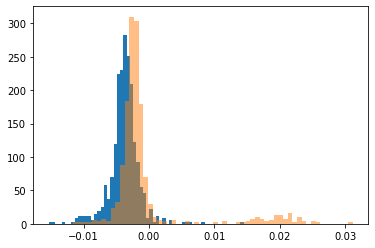

In [40]:
feature = 1627
plt.hist(df_rw[f"feature_{feature}"], bins=60, density=True)
plt.hist(df_sim[f"feature_{feature}"], alpha=.5, bins=60, density=True)[0][0]

In [41]:
means = df.groupby(["is_rw"]).mean()
group_diffs = ((means.iloc[0] - means.iloc[1])/df.std()).abs()[[c for c in df.columns if "feature_" in c]]
top_group_diffs = group_diffs.sort_values(ascending=False)
top_group_diffs.head(50)

/tmp/ipykernel_2295493/367285564.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  group_diffs = ((means.iloc[0] - means.iloc[1])/df.std()).abs()[[c for c in df.columns if "feature_" in c]]


feature_420     0.754412
feature_64      0.745577
feature_1675    0.744102
feature_205     0.738101
feature_865     0.736092
feature_1219    0.732623
feature_1296    0.726923
feature_380     0.718978
feature_1195    0.716969
feature_1119    0.705027
feature_819     0.685312
feature_1425    0.682128
feature_766     0.672469
feature_20      0.665824
feature_335     0.664373
feature_877     0.661190
feature_1572    0.660418
feature_265     0.659216
feature_538     0.657547
feature_168     0.653604
feature_346     0.642215
feature_929     0.640069
feature_1288    0.637757
feature_1230    0.637682
feature_1121    0.635908
feature_424     0.635672
feature_628     0.634101
feature_1250    0.634046
feature_376     0.633482
feature_864     0.633442
feature_1279    0.633247
feature_1386    0.632427
feature_1627    0.631727
feature_254     0.627807
feature_632     0.625358
feature_19      0.621822
feature_726     0.621405
feature_847     0.620352
feature_896     0.619904
feature_1501    0.617784


(3.204068581883218, -0.020126343)

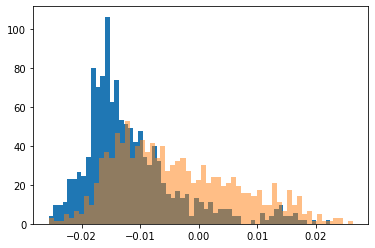

In [58]:
feature = 420
plt.hist(df_rw[f"feature_{feature}"], bins=60, density=True)
plt.hist(df_sim[f"feature_{feature}"], alpha=.5, bins=60, density=True)[0][0], target_obs[f"feature_{feature}"]

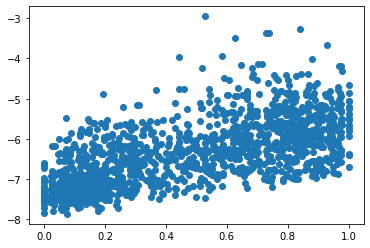

In [42]:
plt.scatter(df.is_rw_pred, df.unc_p)

In [43]:
df.to_pickle(f"{BESPOKE_ROOT}/tmp/latents.pkl")

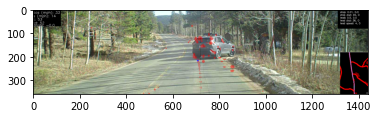

In [53]:
img_id = 785
plt.imshow(imgs[img_id])

In [54]:
target_obs = df[df.img_id==img_id].iloc[0]
target_obs

unc_p              -6.164062
tire_angle         -0.001854
approaching_stop    0.011687
has_lead            0.504761
tire_angle_loss     0.000013
                      ...   
feature_1788       -0.008492
feature_1789       -0.003618
feature_1790       -0.003616
feature_1791       -0.005211
is_rw_pred          0.891892
Name: 65, Length: 1810, dtype: object

In [55]:
top_diff = ((df.mean() - target_obs)/df.std()).abs().sort_values(ascending=False)
top_diff

/tmp/ipykernel_2295493/1405052404.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  top_diff = ((df.mean() - target_obs)/df.std()).abs().sort_values(ascending=False)


feature_269      5.81774
feature_1659    5.393883
feature_924      4.68681
feature_1777    4.596116
feature_1094    4.091894
                  ...   
feature_749     0.002835
feature_298     0.002225
feature_1422    0.001313
feature_1496    0.001239
rollout_id           NaN
Length: 1810, dtype: object

In [47]:
[d for d in list(top_diff.iloc[:200].index) if d in list(top_group_diffs.iloc[:200].index)]

['feature_66',
 'feature_1640',
 'feature_268',
 'feature_963',
 'feature_1433',
 'feature_302',
 'feature_1159',
 'feature_929',
 'feature_1714',
 'feature_766']

(6.068148148148148, 0.11212158)

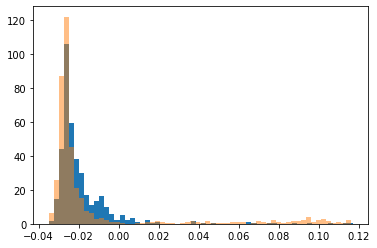

In [57]:
feature = 924
plt.hist(df_rw[f"feature_{feature}"], bins=60, density=True)
plt.hist(df_sim[f"feature_{feature}"], alpha=.5, bins=60, density=True)[0][0], target_obs[f"feature_{feature}"]